# Telecom Customers Loan Delinquency Prediction 

#### Description :<br>
Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes.<br>

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

#### Problem Statement :<br>
Telecom operator have multiple way of sending the reminders , but sending reminders to every customer is not the solution to get back the loaned amount, as it ends up wasting important resources. Telecom operator needs to find out the customers that have higher chances of being delinquent, so that they can prioratize these customers and send reminders to these customers with appropriate channel.




### Data Description :


A Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days.<br>

The sample data from client database is hereby given to you for the exercise.


### Project :

Creating a Telecom Customers delinquency prediction model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of issue of loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("sample_data_intw.csv")

## EDA 

In [3]:
datainfo=pd.read_csv("datadesc.csv")

In [4]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


### Column Description

In [4]:
pd.set_option('display.max_colwidth', None)
datainfo

,Variable,Definition,Comment
0,label,Flag indicating whether the user paid back the credit amount within 5 days of issuing the anount,"{1:success, 0:failure}"
1,msisdn,mobile number of user,NaN
2,aon,age on cellular network in days,NaN
3,daily_decr30,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)",NaN
4,daily_decr90,"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",NaN
5,rental30,Average main account balance over last 30 days,Unsure of given definition
6,rental90,Average main account balance over last 90 days,Unsure of given definition
7,last_rech_date_ma,Number of days till last recharge of main account,NaN
8,last_rech_date_da,Number of days till last recharge of data account,NaN
9,last_rech_amt_ma,Amount of last recharge of main account (in Indonesian Rupiah),NaN


In [5]:
df.shape

(209593, 36)

####  Dataset contains 2,09,593 records and 36 features

## Checking DataTypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

## Checking Null Vaues

In [9]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

#### Dataset contains no null values 

## Inspecting for negative, min and Max values

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


##### It looks like there are certain negative values in following columns :<br>
* aon, daily_decr30,daily_decr90, rental30 , rental90 , last_rech_date_ma and last_rech_date_da <br>
* This negative values needs to be treated as it looks like false information or some data entry error</div>

#### Taking a closure look at how many Negative values are there in these columns

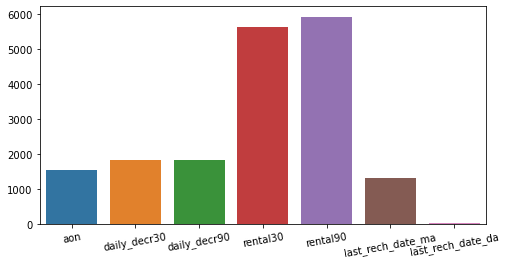

In [6]:
listnegative=[]
dict1={}
collist=["aon", "daily_decr30","daily_decr90","rental30" , "rental90" , "last_rech_date_ma" ,"last_rech_date_da"]
for col in collist:
    count=0
    for value in list(df[col]):
        if(value<0):
            count+=1
    dict1[col]=count 
plt.figure(figsize=(8,4))    
sns.barplot(x=list(dict1.keys()),y=list(dict1.values()))
plt.xticks(rotation=10)
plt.show()

#### There are significant amount of Negative values.so, replacing them with positive values of same magnitude

In [7]:
df2=df
df2[["aon", "daily_decr30","daily_decr90","rental30" , "rental90" , "last_rech_date_ma" ,"last_rech_date_da"]]=df2[["aon", "daily_decr30","daily_decr90","rental30" , "rental90" , "last_rech_date_ma" ,"last_rech_date_da"]].abs()

In [8]:
listnegative=[]
dict1={}
collist=["aon", "daily_decr30","daily_decr90","rental30" , "rental90" , "last_rech_date_ma" ,"last_rech_date_da"]
for col in collist:
    count=0
    for value in list(df2[col]):
        if(value<0):
            count+=1
    dict1[col]=count 
dict1

{'aon': 0,
 'daily_decr30': 0,
 'daily_decr90': 0,
 'rental30': 0,
 'rental90': 0,
 'last_rech_date_ma': 0,
 'last_rech_date_da': 0}

#### We can now see that negative values have been removed and they are now replaced with positive values

## Inspecting Categorical Variables

In [9]:
df2["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [10]:
df2["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Accortding to our problem statement we have to find class 1 observations i.e. delequent customers so they must be assigned label 1

In [11]:
df2["label"]=df["label"].map({1:0,0:1})

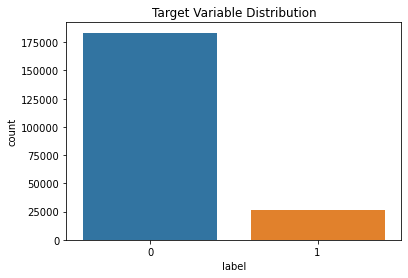

In [12]:
sns.countplot(df["label"])
plt.title("Target Variable Distribution")
plt.show()

- "pCircle" have all common values so it can be dropped as it will not add any extra information for classification 
- we can get certain insights from pDate if we do some feature Engineering on it </b> </div>
- Target Variable is Imbalanced so some resampling might be required to improve performance metrics 

## Inspecting Numerical Variables

In [13]:
numercal_columns=[]
for col in df.columns:
    if df[col].dtype in ["float64","int64"] and col not in ["label"]:
        numercal_columns.append(col)

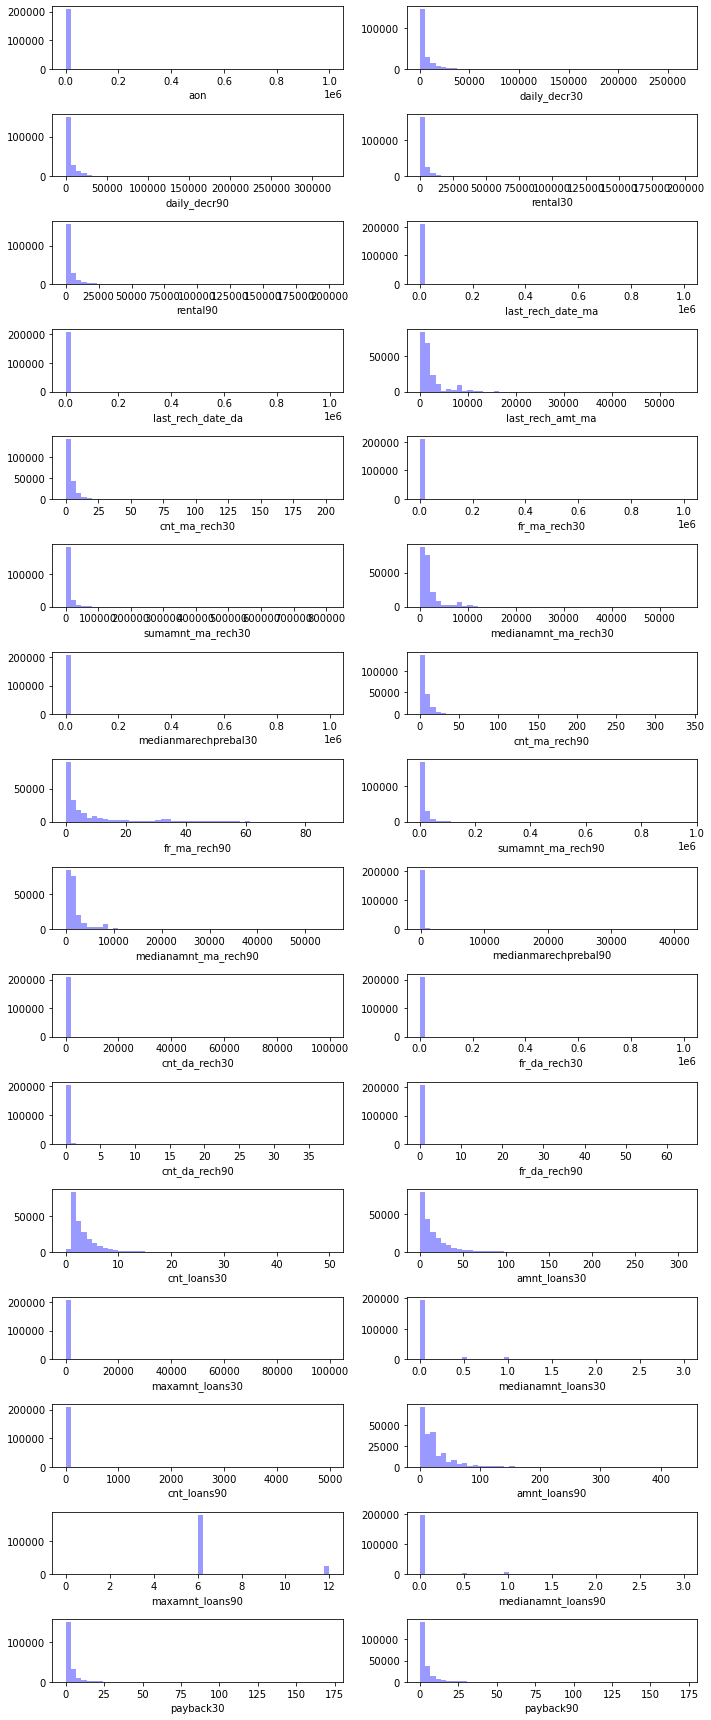

In [28]:
fig,ax = plt.subplots(16,2,figsize=(10,24))
ax = ax.flatten()
for i,col in enumerate(numercal_columns):
    sns.distplot(df2[col],ax=ax[i],color='blue',kde=False)
plt.tight_layout()
plt.show()

###  Inference :
####   Data is skewed for lot of features so it will require feature Transformations.for better predictions for some of the algorithms,
since few of algorithms assumes data is normally distributed I will apply Yeo-johnson Transdormation and as scalers bring our data to same scale and our algorithm can learn equally from each variable I will be using Standard Scalers for few algorithms 


### Checking for Outliers

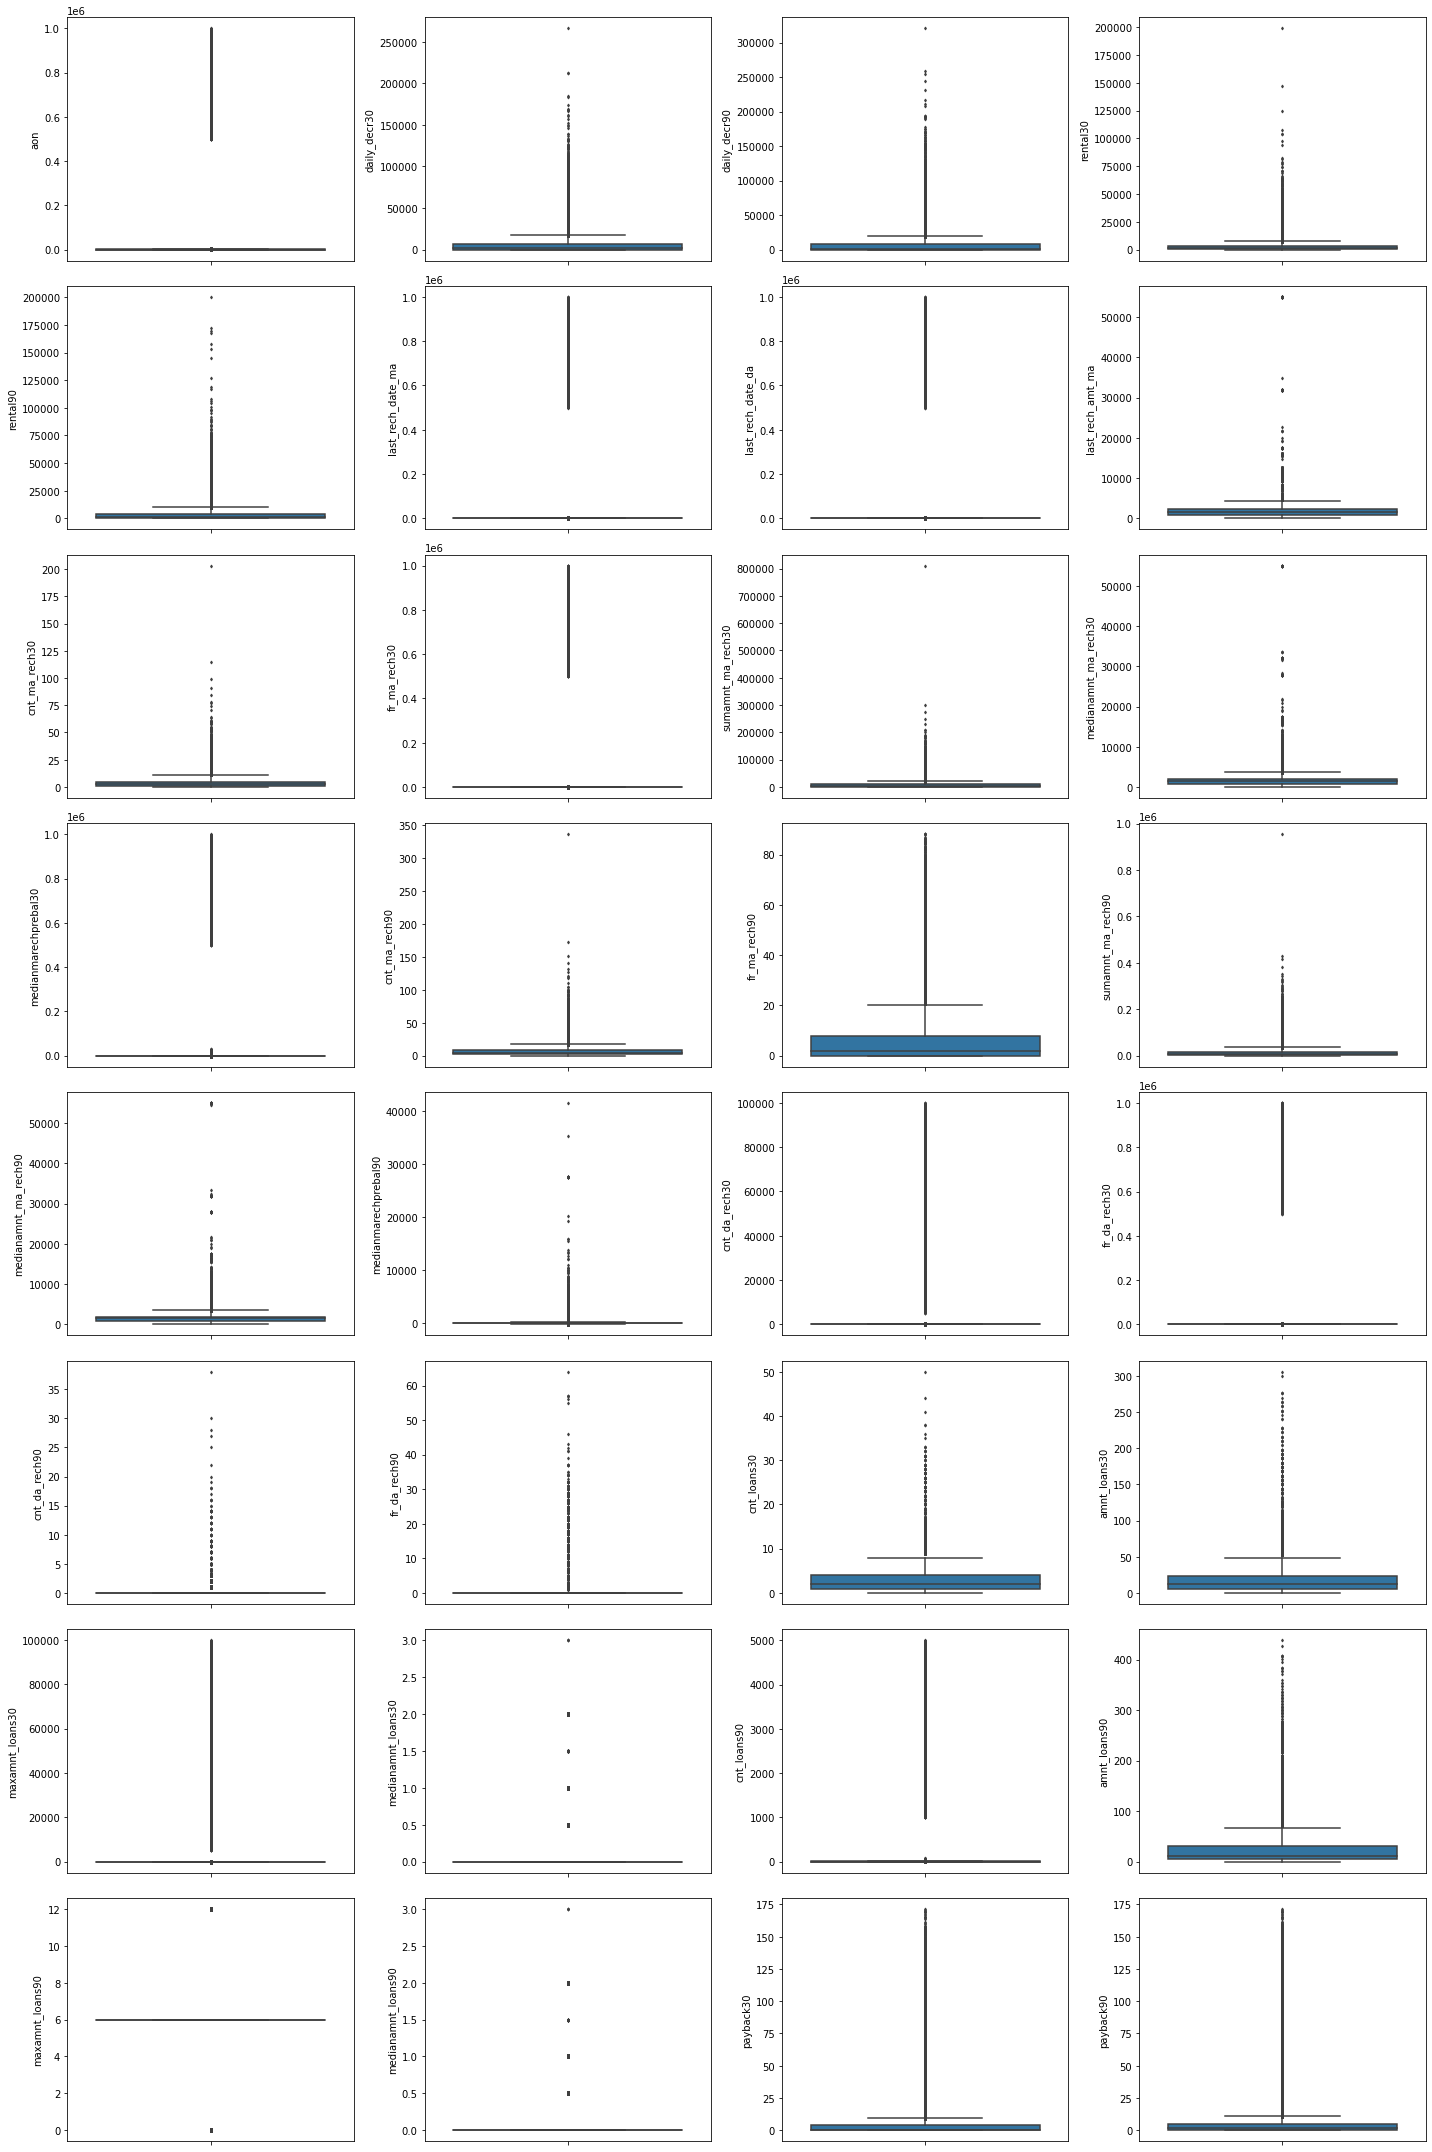

In [65]:
fig,ax = plt.subplots(8,4,figsize=(20,30))
ax = ax.flatten()
for i,col in enumerate(numercal_columns):
    sns.boxplot(y=df2[col],ax=ax[i],fliersize=2)
plt.tight_layout()
plt.show()

### Inference :
Since, Outliers can be beneficial in predicting Delinquency of Customers and not every outlier shown by boxplot should be treated as outlier , for now I will keep them as it is in the dataset as they might be natural outliers and some of them might be artificial so it needs to be investigated seperately.

## Counting Outliers

It is required to have rough understanding of number of outliers in each column so as to decide whether to keep them or remove them as there might be some natural outliers I will count observations as outliers if their z score is greator than 4.

In [29]:
from scipy import stats

* According to theory of Statistics all the points beyond z score of 3 can be considered as outliers , but there is no hard and fast rule. in reality these can be natural outliers.but as we dont have enough domain knowledge for simplicity I will stick to statistical defination of outler and calculated total number of them.

## Z score method

In [30]:
no_of_untliers={}
for cols in numercal_columns:
    l1=stats.zscore(df[cols])
    l1=np.abs(l1)
    count=0
    for values in l1:
        if(values>3):
            count+=1
    no_of_untliers[cols]=count

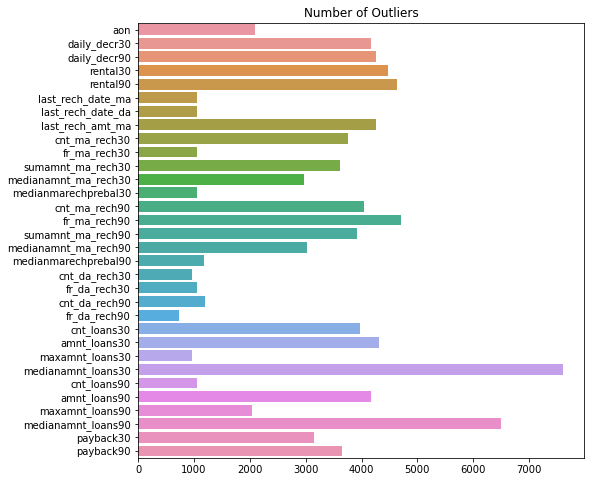

In [121]:
plt.figure(figsize=(8,8))    
sns.barplot(y=list(no_of_untliers.keys()),x=list(no_of_untliers.values()))
plt.title("Number of Outliers")
plt.show()

#### Total outlier count

In [14]:
count1=0
for v in no_of_untliers.values():
    count1+=v
print("Total number of outlier points :", count1)

Total number of outlier points : 96655


* #### Percent outliers

In [145]:
print("Percent of outliers using z score =",round((96655/(209593*36))*100,2), " %")

Percent of outliers using z score = 1.28  %


### IQR method

In [14]:
dfNum=df[numercal_columns]

In [141]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [142]:
outliers = pd.DataFrame({'Feature':outliers.index, 'count':outliers.values}).sort_values(by='count',ascending=False)
outliers = outliers[outliers['count']>0]
outliers['Percentage'] = outliers['count']/df.shape[0]

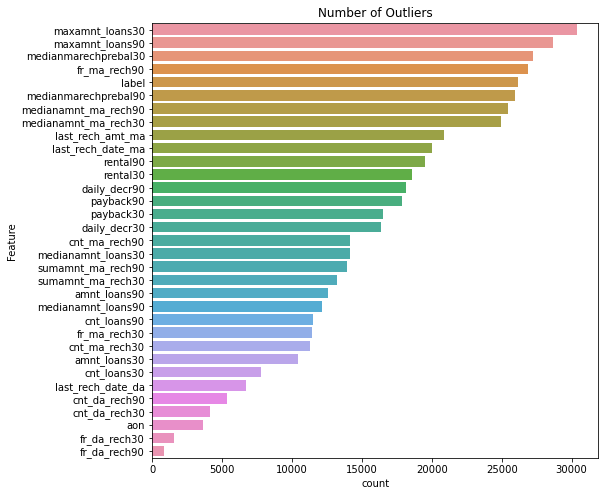

In [139]:
plt.figure(figsize=(8,8))    
sns.barplot(y="Feature",x="count",data=outliers)
plt.title("Number of Outliers")
plt.show()

In [143]:
(outliers["count"]).sum()

518460

In [144]:
print("Percent of outliers using IQR =",round((518460/(209593*36))*100,2), " %")

Percent of outliers using IQR = 6.87  %


## Feature Correlation

#### Since we have lot of features and columns names looks to be corelated ,  I will examine whether some of the features are correlated of not

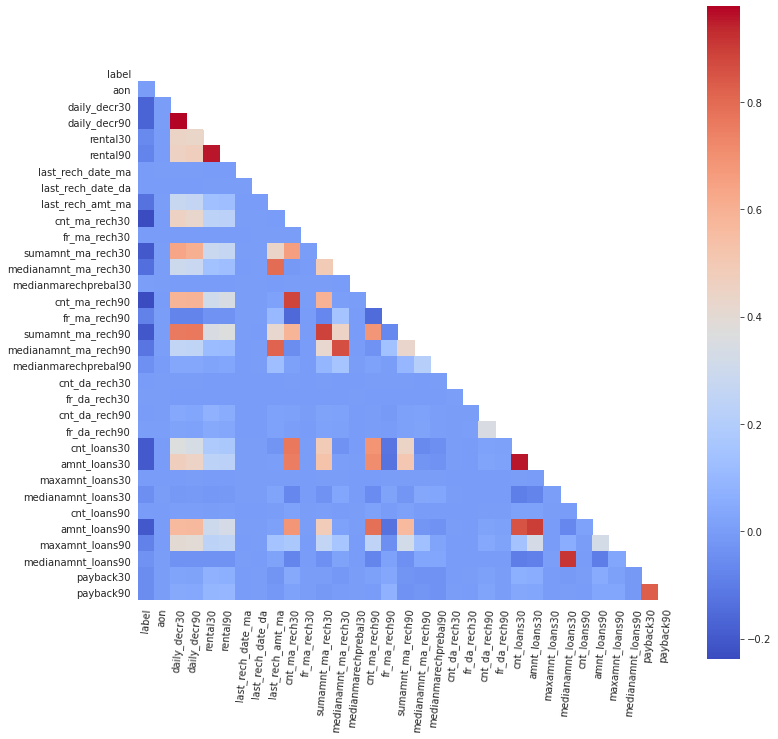

In [60]:
# plt.figure(figsize=())
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(df.corr(), mask=mask,square=True,cmap="coolwarm")
plt.xticks(rotation=85)
plt.show()

#### Inference :
from a heatmap we can see that some of the features are corelated so we can remove 1 among two highly corelated features to get better performance and to avoid over fitting in some algorithms like logistic regression

#### Topmost highly correlated features

In [62]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("*******************************************************")
print("        highly correlated features")
print("*******************************************************")

print(get_top_abs_correlations(df2.drop(["msisdn","pdate","pcircle"],axis=1), 15))

*******************************************************
        highly correlated features
*******************************************************
daily_decr30          daily_decr90            0.977704
cnt_loans30           amnt_loans30            0.957742
rental30              rental90                0.955014
medianamnt_loans30    medianamnt_loans90      0.911604
amnt_loans30          amnt_loans90            0.897961
sumamnt_ma_rech30     sumamnt_ma_rech90       0.889989
cnt_ma_rech30         cnt_ma_rech90           0.886433
medianamnt_ma_rech30  medianamnt_ma_rech90    0.864846
cnt_loans30           amnt_loans90            0.852905
payback30             payback90               0.830363
last_rech_amt_ma      medianamnt_ma_rech90    0.818734
                      medianamnt_ma_rech30    0.794646
cnt_ma_rech90         amnt_loans90            0.783419
daily_decr90          sumamnt_ma_rech90       0.768816
cnt_ma_rech30         cnt_loans30             0.765802
dtype: float64


## Checking Feature Importance

* As Target Variable is Categorical , I'm Trying to understand which all Numeric variables are Importsnt for classification, using boxplot.

* Doing this just to get initial understanding , I will be using more sofisticated methods later.
like feature importance of Randome Forest Classifier and statistical test

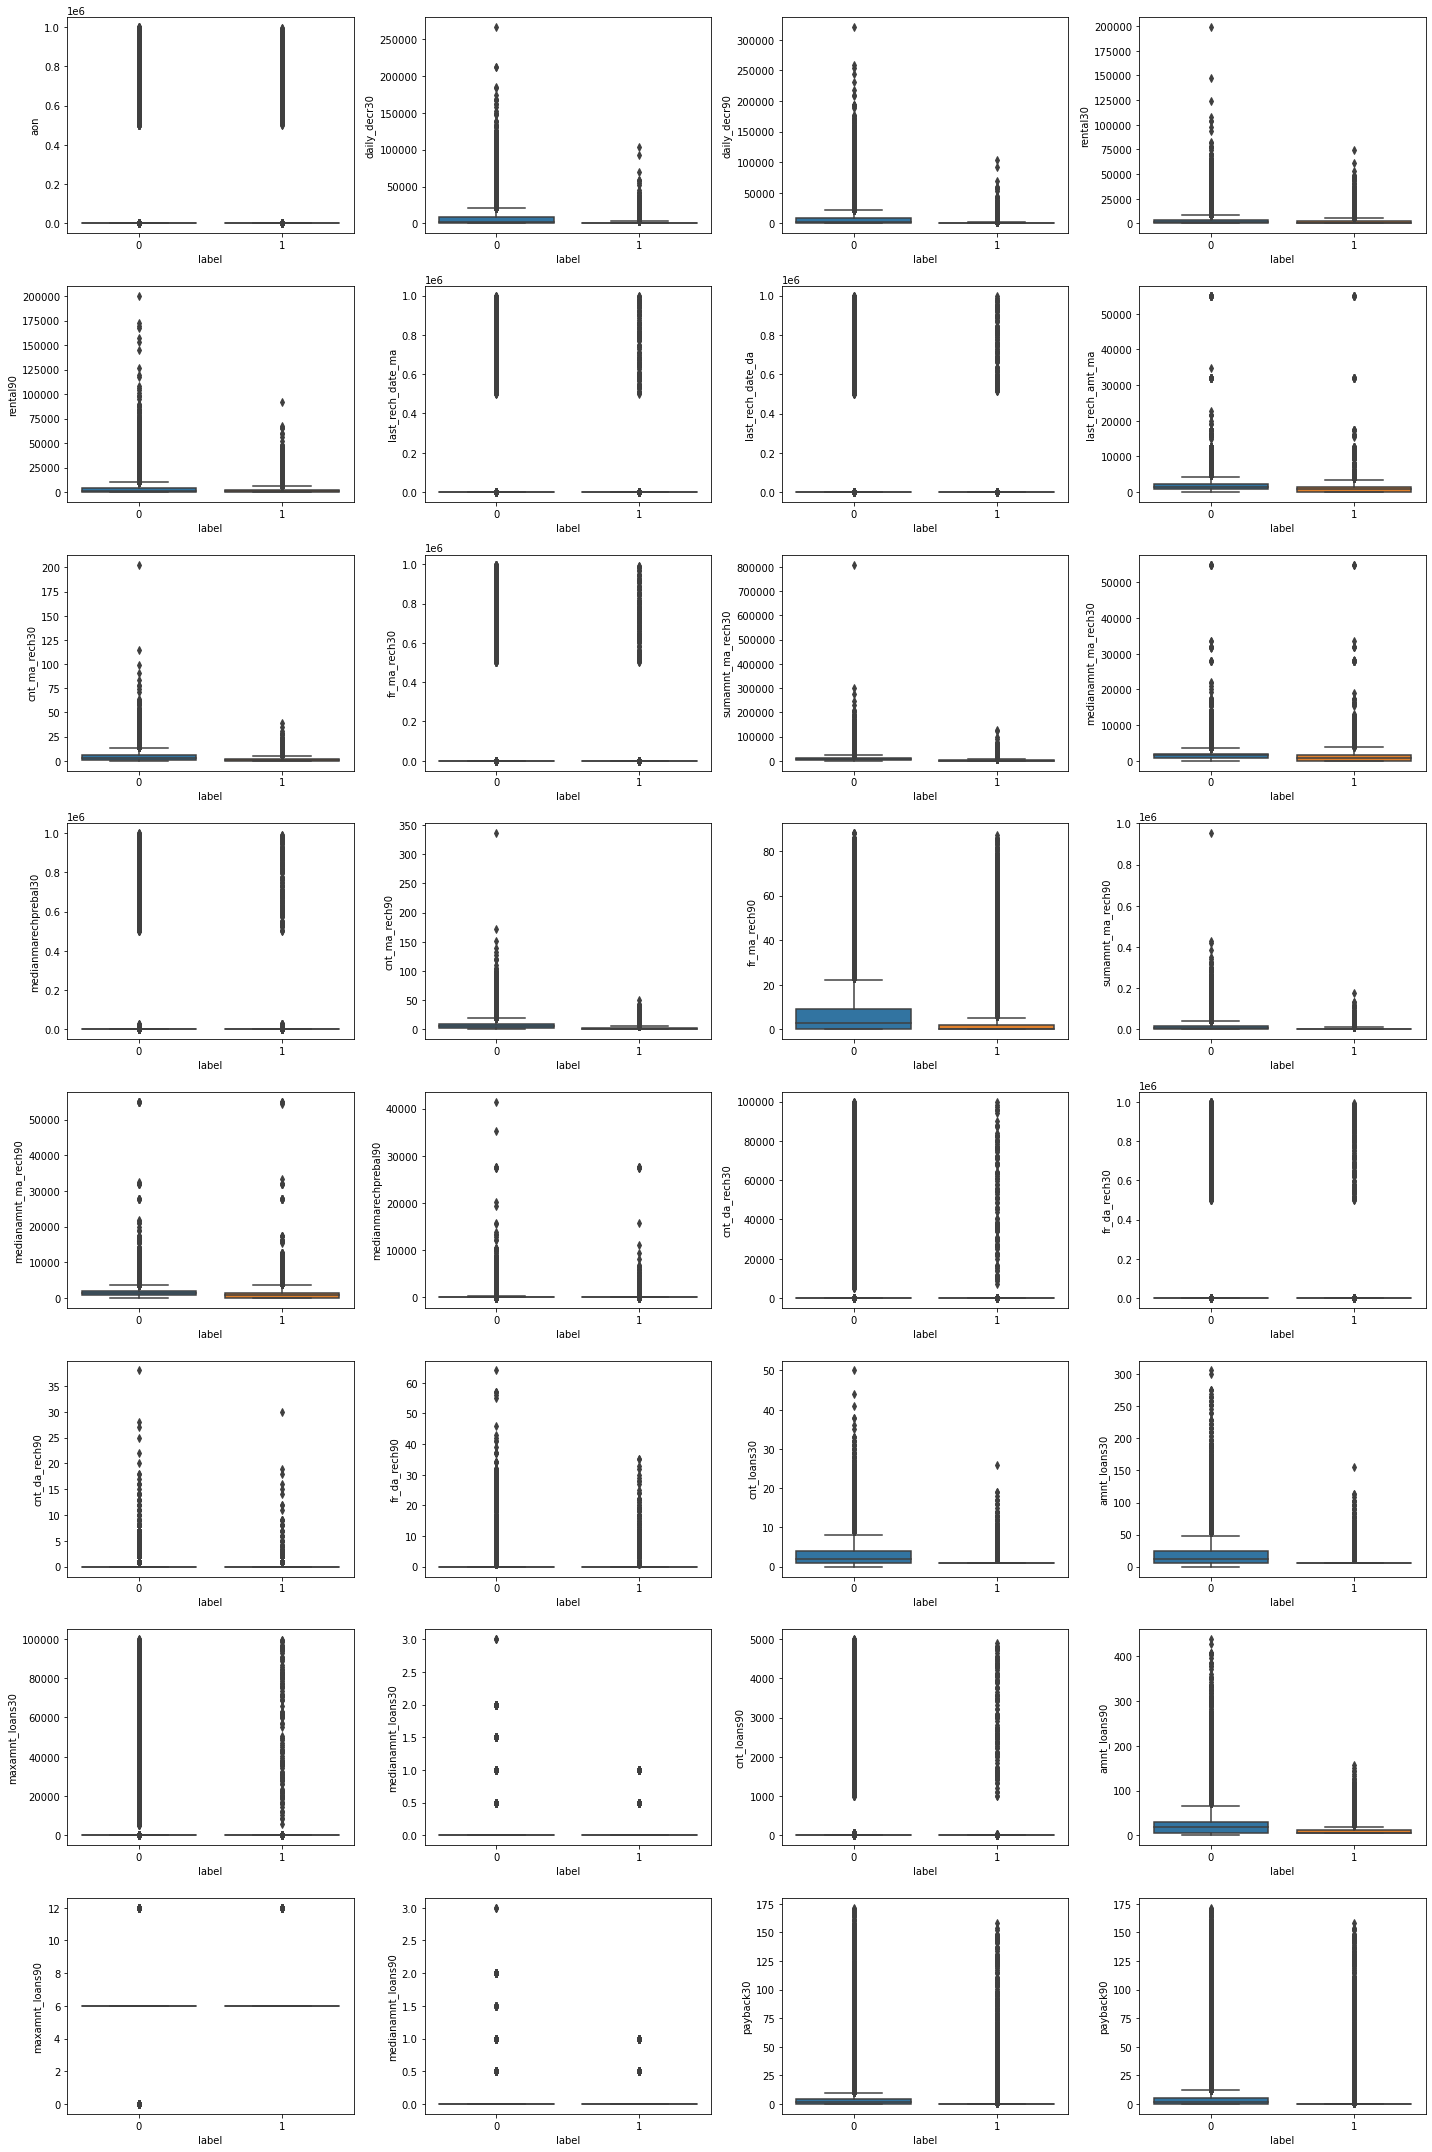

In [66]:
fig,ax = plt.subplots(8,4,figsize=(20,30))
ax = ax.flatten()
for i,col in enumerate(numercal_columns):
    sns.boxplot(y=df[col],ax=ax[i],x=df["label"])
plt.tight_layout()
plt.show()

### Inference :
#### Among all the Features:
As per the Box Plots:
aon ,<br> last_recharge_date_ma ,<br> ffr_ma_rech30 ,<br> medianmarechprebal30 ,<br> medianmarechprebal30 ,<br> cnt_loans90 <br> don't seems to be adding too much information in classification of target variable.but this migh be misleading as box-plot itself are not clear and quite <b>misleading</b> because of presence of outliers

#  Feature Engineering

#### Since date of recharge can be important variable I'm doing some feature engineering on it

In [15]:
df2["pdate"]=pd.to_datetime(df2["pdate"],dayfirst=True)

In [16]:
def period_of_month(col):
    if col<10 and col>=1:
        return "start"
    elif col>=10 and col<=20:
        return "mid"
    else:
        return "end"

In [17]:
df2['day'] = df2['pdate'].dt.day
df2['month'] = df2['pdate'].dt.month
df2['year'] = df2['pdate'].dt.year
df2['weekday'] = df2['pdate'].dt.weekday
df2["period_of_month"]=df2['day'].apply(period_of_month)
df2["period_of_week"]=np.where(df2["weekday"]<5,"workday","weekend")

#### EDA of Newly Created Features

* #### Period of month v/s Target

In [18]:
period_of_month_table_count = pd.crosstab(index=df2["period_of_month"], 
                          columns=df2["label"])
period_of_month_table_percent = pd.crosstab(index=df2["period_of_month"], 
                          columns=df2["label"]).apply(lambda r: r/r.sum(), axis=1)

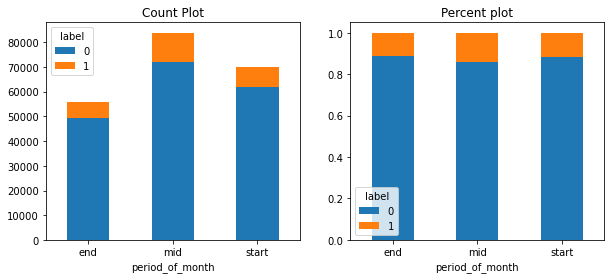

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
period_of_month_table_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)


period_of_month_table_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

More people have taken loan in mid of the month so the number of delequent customers are also high in that period and percent of people defaulting the loan is also slightly high in that period

* ####  Period of Week v/s Target

In [33]:
period_of_week_table_count = pd.crosstab(index=df2["period_of_week"], 
                          columns=df2["label"])
period_of_week_table_percent = pd.crosstab(index=df2["period_of_week"], 
                          columns=df2["label"]).apply(lambda r: r/r.sum(), axis=1)


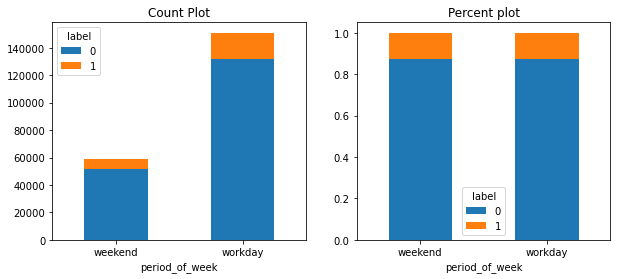

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
period_of_week_table_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)


period_of_week_table_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

More number of people have taken loan during the working days and the percent of delenquet customers are same for both classes

* #### Week day vs Target

In [35]:
day_of_week_table_count = pd.crosstab(index=df2["weekday"], 
                          columns=df2["label"])
day_of_week_table_percent = pd.crosstab(index=df2["weekday"], 
                          columns=df2["label"]).apply(lambda r: r/r.sum(), axis=1)

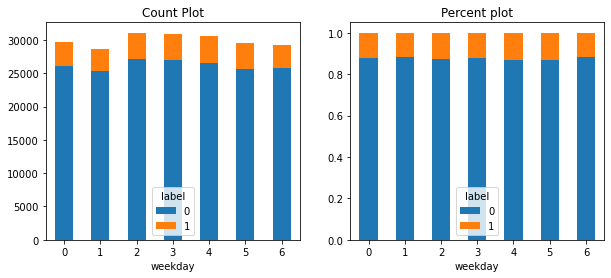

In [36]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
day_of_week_table_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)


day_of_week_table_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

Day wise there seems almost no difference in percent delinquent customers 

* #### Month vs Target

In [37]:
month_wise_table_count = pd.crosstab(index=df2["month"], 
                          columns=df2["label"])
month_wise_table_percent = pd.crosstab(index=df2["month"], 
                          columns=df2["label"]).apply(lambda r: r/r.sum(), axis=1)

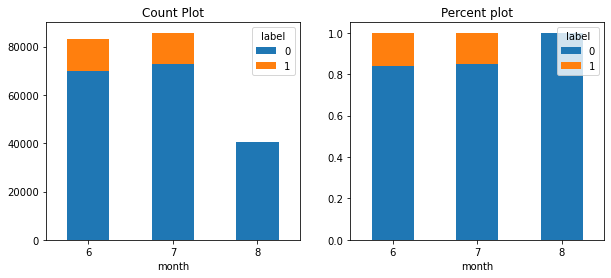

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
month_wise_table_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)


month_wise_table_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

Interstingly in month of August we dint have any delenquent cutomers. we nned to investigate the reason while in month of june and july we had almost same percent and number of delenquent customers.

#### here, I will not include month as a feature as there is some problem in the month of august , so our model may learn wrong thing , it may predict that customer will never be delinquenct if he do recharge in month of August

# Data Preprocessing 

#### Dropping Duplicates

In [18]:
df2=df2.drop_duplicates()

#### Dropping unimportant columns

In [19]:
df2.drop(columns=["msisdn",'pcircle',"pdate","period_of_week","year","month"],axis=1,inplace=True)

#### Dealing with negative values

In [20]:
df2[numercal_columns]=df2[numercal_columns].abs()

 ### Dealing with Outliers

#### Here we have no missing values but lot of outlers. we tried different strategies to deal with outliers for example removing the outlers , imputing the outliers , capping the outliers and keeping outliers as it is, all of which gave similar score on performance metrics.
* Imputing the outliers and capping the outliers gave a little poor results as compared to removing all the outliers and keeping all the outliers.
* as results of removing all the outliers and keeping all the outliers were exactly similar , we finally choose to keep all the outliers so that our model can deal with  outliers even on test observations and can also learn from it.

* #### Removing outliers

In [20]:
dfwo_z=df2.copy()
dfNum=df2[numercal_columns]
dfwo_z=df2[(np.abs(stats.zscore(dfNum)) < 3).all(axis=1)]

* #### Capping  outliers

In [151]:
dfwo_cap=df2.copy()
for col in numercal_columns:
    ub=dfwo_cap[col].quantile(0.75)+1.5*( dfwo_cap[col].quantile(0.75)-dfwo_cap[col].quantile(0.25))
    dfwo_cap[col]=np.where(abs(stats.zscore(dfwo_cap[col]))<3,dfwo_cap[col],ub)

* #### Imputing outliers with median

In [154]:
dfwo_med=df2.copy()
for col in numercal_columns:
    dfwo_med[col]=np.where(abs(stats.zscore(dfwo_med[col]))<3,dfwo_med[col],np.median(dfwo_med[col]))

* #### Dependant Independant feature split

In [21]:
X = df2.drop(['label'], axis=1)
y = df2['label']

##  Logistic Regression


* #### Data Preparation

In [41]:
X.drop(["day","weekday"],axis=1,inplace=True)

* #### One hot encoding

In [42]:
X=pd.get_dummies(X,drop_first=True)

* #### Train, validation and Test split

In [25]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=8125)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=8125)
train = pd.concat([X_train, y_train],axis=1)

In [22]:
# y_train.head()

* ####  Scaling and Transformation

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [46]:
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson', standardize=False)
pipeline = Pipeline(steps=[('p', power),('s', scaler)])
X_train_scaled_transformed = pipeline.fit_transform(X_train)
X_validate_scaled_transformed = pipeline.transform(X_validate)

* #### Hyperparameter tuning

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, log_loss, f1_score, recall_score, roc_auc_score,precision_score,accuracy_score
import optuna
from lightgbm import LGBMClassifier


* ####  Hyperparameter tuning

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [35]:
# y_train

In [1]:
def objective(trial):
 
    param = {
        'max_iter':100,
        'penalty': trial.suggest_categorical('penalty',['l2','l1']),
        'class_weight':'balanced',
        'solver': 'saga',
        'C': trial.suggest_loguniform('C', 1e-6, 10),
    }
 
    lr = LogisticRegression(**param)

    score = cross_val_score(lr,X_train_scaled_transformed, y_train,scoring="average_precision",n_jobs=-1, cv=5)
    meanPrecision = score.mean()
    return meanPrecision

study_lr1 = optuna.create_study(direction='maximize')
study_lr1.optimize(objective, n_trials=30)

In [42]:
lr_best_params=study_lr1.best_params

In [50]:
#0.4473526263213154
lr_best_params={'penalty': 'l1', 'C': 9.916107537552591}

####  Logistic Regression with best hyper parameters 

In [51]:
lr1 = LogisticRegression(solver='saga',
                        class_weight='balanced',
                        max_iter=100,
                        **lr_best_params
                        )

lr1.fit(X_train_scaled_transformed, y_train)
# y_pred = lr1.predict(X_test_scaled_transformed)
# y_pred_prob = lr1.predict_proba(X_test_scaled_transformed)[:,1]
# print(classification_report(y_test,y_pred))

LogisticRegression(C=9.916107537552591, class_weight='balanced', penalty='l1',
                   solver='saga')

#### Precision Recall Curve

In [28]:
from sklearn.metrics import average_precision_score, precision_recall_curve

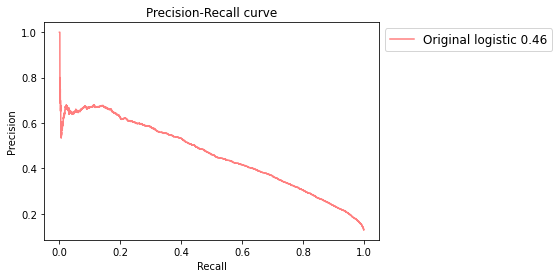

In [53]:
pred_prob = lr1.predict_proba(X_validate_scaled_transformed)
y_score = pred_prob[:,1]
average_precision_lr = round(average_precision_score(y_validate, y_score),4)
original_precision, original_recall, original_thresholds = precision_recall_curve(y_validate, y_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

In [54]:
average_precision={}
average_precision['logistic_reegression']=average_precision_lr

* #### With Smote

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state=4001,sampling_strategy=0.5)

In [57]:
X_train_new, y_train_new = sm.fit_resample(X_train_scaled_transformed, y_train)

In [58]:
lr1_smote = LogisticRegression(solver='saga',
                        class_weight='balanced',
                        max_iter=100,
                        **lr_best_params
                        )

lr1_smote.fit(X_train_new, y_train_new)

# y_pred = lr1_smote.predict(X_test_scaled_transformed)
# y_pred_prob = lr1_smote.predict_proba(X_test_scaled_transformed)[:,1]
# print(classification_report(y_test,y_pred))

LogisticRegression(C=9.916107537552591, class_weight='balanced', penalty='l1',
                   solver='saga')

#### Precsion Recall Curve

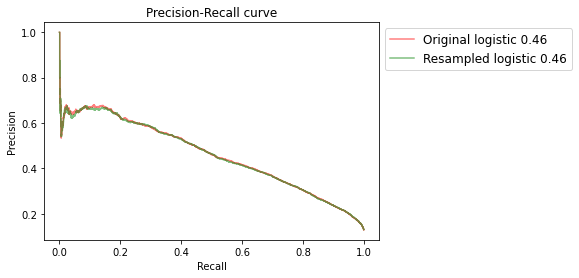

In [59]:
pred_prob = lr1_smote.predict_proba(X_validate_scaled_transformed)
resampled_score = pred_prob[:,1]
average_precision_lr_smote = round(average_precision_score(y_validate, y_score),4)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_validate, resampled_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label=f'Resampled logistic {average_precision_lr_smote}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

##### As from the Graph we can see that using SMOTE is not imporving the model significantly, so we will stick with original data

In [60]:
average_precision["Logistic_regression_smote"]=average_precision_lr_smote

#### Feature Importance

In [61]:
feat_imp_lr1=pd.DataFrame({'Feature':X_train.columns, 'CoeffValue':np.abs(lr1.coef_[0])}).sort_values(by='CoeffValue',ascending=False)

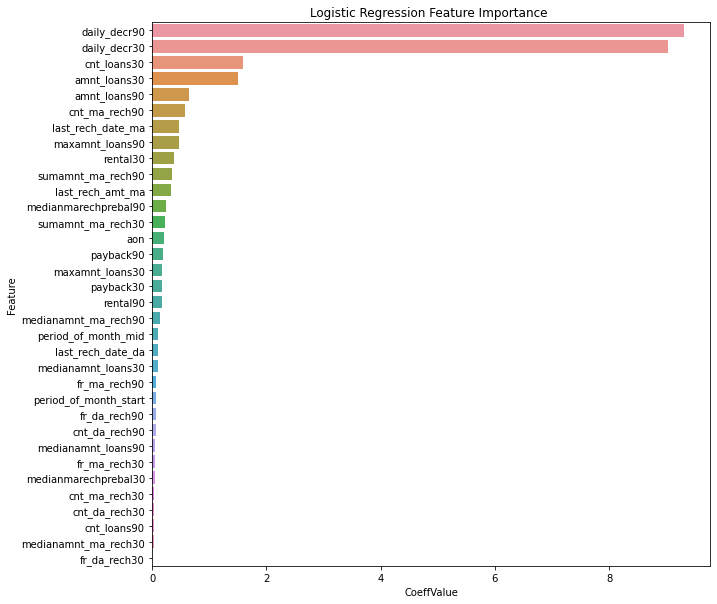

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(feat_imp_lr1["CoeffValue"],feat_imp_lr1["Feature"])
plt.title("Logistic Regression Feature Importance ")
plt.show()

##    Random Forest

* #### Data Preparation for Random Forest

In [22]:
X=df2.drop(['day','weekday','label'],axis=1)
y=df2['label']
X["period_of_month"]=X["period_of_month"].map({'mid':1,'start':2,'end':3})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=8125)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=8125)
train = pd.concat([X_train, y_train],axis=1)

* #### Hyperparameter tuning

In [1]:
def objective(trial):
 
    param = {
        'n_estimators':100,
        'class_weight':'balanced',
        'n_jobs':-1,
        'random_state':3,
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 16),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 16),
        'max_features': trial.suggest_uniform('max_features', 0.3, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.3, 1.0),
    }
 
    rf = RandomForestClassifier(**param)    
    
    score = cross_val_score(rf,X_train, y_train,scoring="average_precision",n_jobs=-1, cv=5)
    meanPrecision = score.mean()
    return meanPrecision
    

study_rf1 = optuna.create_study(direction='maximize')
study_rf1.optimize(objective, n_trials=10)

In [64]:
study_rf1.best_params

{'max_features': 0.9541071040781071, 'max_samples': 0.34829882722477457}

In [71]:
rf1_best_params ={'max_features': 0.9541071040781071, 'max_samples': 0.34829882722477457}

In [45]:
rf1_best_params ={'min_samples_leaf': 5, 'max_features': 0.5377155398501973, 'max_samples': 0.672603803581167}

In [65]:
# Average precsion
rf_best_params={'max_features': 0.5946085882705148, 'max_samples': 0.8379821656027628}

In [68]:
rf1 = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            n_jobs=-1,
                            random_state= 3,
#                             **study_rf1.best_params
                            **rf_best_params)
rf1.fit(X_train.values, y_train.values)
# y_pred_rf = rf1.predict(X_test_rf.values)
# y_pred_prob_rf = rf1.predict_proba(X_test_rf.values)[:,1]
# print(classification_report(y_test_rf,y_pred_rf))

RandomForestClassifier(class_weight='balanced', max_features=0.5946085882705148,
                       max_samples=0.8379821656027628, n_jobs=-1,
                       random_state=3)

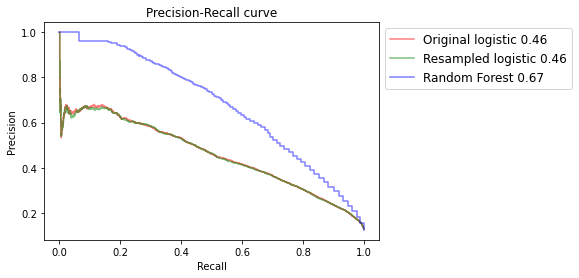

In [69]:
pred_prob = rf1.predict_proba(X_validate)
rf_score = pred_prob[:,1]
average_precision_rf = round(average_precision_score(y_validate, rf_score),4)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_validate, rf_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label=f'Resampled logistic {average_precision_lr_smote}')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label=f'Random Forest {average_precision_rf}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

In [70]:
average_precision['Random_Forest']=average_precision_rf

In [71]:
average_precision

{'logistic_reegression': 0.46,
 'Logistic_regression_smote': 0.46,
 'Random_Forest': 0.67}

In [73]:
import scikitplot as skplt

In [59]:
feat_imp_rf1=pd.DataFrame({'Feature':X_train.columns, 'Value':rf1.feature_importances_}).sort_values(by='Value', ascending=False)


#### Feature Importance Random Forest

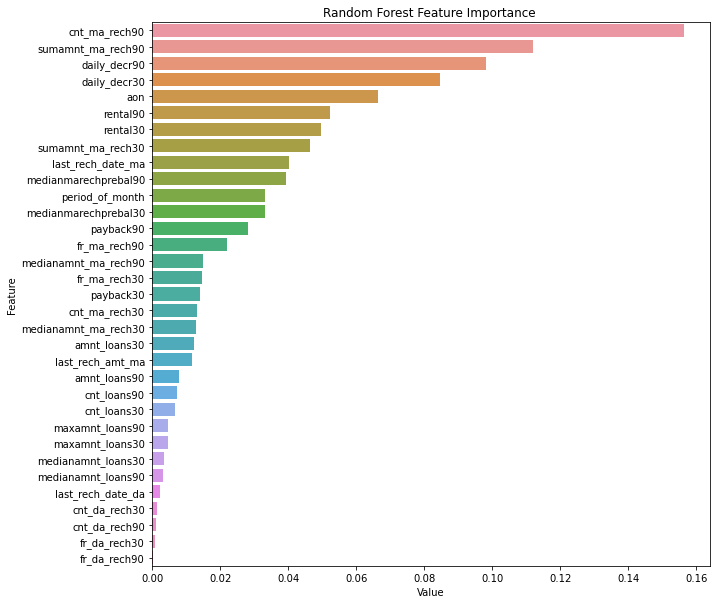

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(feat_imp_rf1["Value"],feat_imp_rf1["Feature"])
plt.title("Random Forest Feature Importance ")
plt.show()

#### with Smote

In [63]:
X_train_new_rf, y_train_new_rf = sm.fit_resample(X_train, y_train)

In [73]:
rf1 = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            n_jobs=-1,
                            random_state= 3,
#                             **study_rf1.best_params
                            **rf_best_params)
rf1.fit(X_train_new_rf.values, y_train_new_rf.values)
# y_pred_rf = rf1.predict(X_test_rf.values)
# y_pred_prob_rf = rf1.predict_proba(X_test_rf.values)[:,1]
# print(classification_report(y_test_rf,y_pred_rf))

RandomForestClassifier(class_weight='balanced', max_features=0.5946085882705148,
                       max_samples=0.8379821656027628, n_jobs=-1,
                       random_state=3)

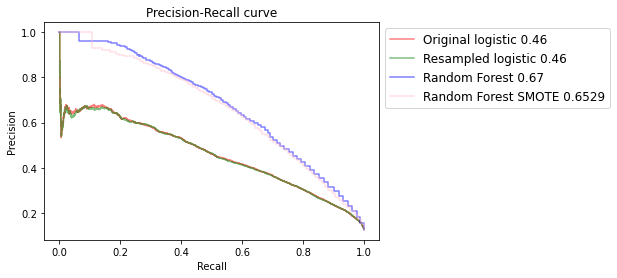

In [74]:
pred_prob = rf1.predict_proba(X_validate)
rf_score = pred_prob[:,1]
average_precision_rf_smote = round(average_precision_score(y_validate, rf_score),4)
rf_precision_s, rf_recall_s, rf_thresholds_s = precision_recall_curve(y_validate, rf_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label=f'Resampled logistic {average_precision_lr_smote}')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label=f'Random Forest {average_precision_rf}')
plt.step(rf_recall_s, rf_precision_s, color='pink', alpha=0.5,linewidth=1.5,label=f'Random Forest SMOTE {average_precision_rf_smote}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

 #### Score decreased using SMOTE so I'm dropping idea of using SMOTE

## Light GBM 

In [167]:
def objective(trial):
    param = {
        'learning_rate':0.003,
        'n_estimators':500,
        'is_unbalance':True,
        'boosting_type':'gbdt',
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 10.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 255),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }
 
    lgb = LGBMClassifier(**param)
    
    lgb.fit(X_train_rf, y_train_rf,
            eval_set=(X_test_rf, y_test_rf),
            early_stopping_rounds=10,
            eval_metric=['binary_logloss'],
            verbose=0)
    
    y_pred = lgb.predict(X_test_rf)
    score = f1_score(y_test_rf,y_pred)
    return score

studylgb1 = optuna.create_study(direction='maximize')
studylgb1.optimize(objective, n_trials=20)

In [75]:
lgb1_best_params ={'reg_lambda': 0.009716924892592245, 'reg_alpha': 0.012124499770750405,
                   'num_leaves': 230, 'colsample_bytree': 0.7375192268569648, 
                   'subsample': 0.6448469452057257, 'min_child_samples': 63}

In [76]:
lgb1 = LGBMClassifier(learning_rate=0.003,
                     n_estimators=500,
                     is_unbalance=True,
                     boosting_type='gbdt',
#                      **studylgb1.best_params
                    **lgb1_best_params
                     )

lgb1.fit(X_train.values, y_train.values)
# y_pred_rf = lgb1.predict(X_test_rf.values)
# y_pred_prob_rf = lgb1.predict_proba(X_test_rf.values)[:,1]
# print(classification_report(y_test_rf,y_pred_rf))

LGBMClassifier(colsample_bytree=0.7375192268569648, is_unbalance=True,
               learning_rate=0.003, min_child_samples=63, n_estimators=500,
               num_leaves=230, reg_alpha=0.012124499770750405,
               reg_lambda=0.009716924892592245, subsample=0.6448469452057257)

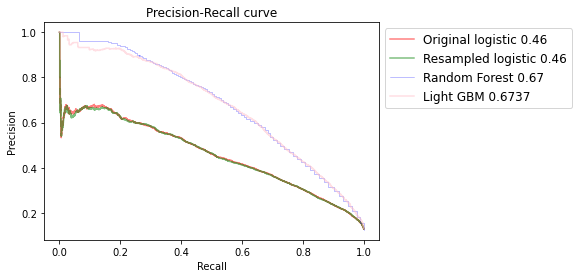

In [79]:
pred_prob = lgb1.predict_proba(X_validate)
lgb1_score = pred_prob[:,1]
average_precision_lgb1 = round(average_precision_score(y_validate, lgb1_score),4)
lgb_precision, lgb_recall, lgb_thresholds = precision_recall_curve(y_validate, lgb1_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label=f'Resampled logistic {average_precision_lr_smote}')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=0.5,label=f'Random Forest {average_precision_rf}')
plt.step(lgb_recall, lgb_precision, color='pink', alpha=0.5,linewidth=1.5,label=f'Light GBM {average_precision_lgb1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

In [ ]:
feat_imp_lgb1=pd.DataFrame({'Feature':X_train_rf.columns, 'Value':lgb1.feature_importances_}).sort_values(by='Value', ascending=False)

In [81]:
average_precision['Light GBM']=average_precision_lgb1

###  XGBOOST 

In [30]:
from xgboost import XGBClassifier

In [2]:
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 4.0),
        'scale_pos_weight':trial.suggest_categorical('scale_pos_weight', [4.2,2.1,0.14,0.1]),
        'alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        'max_leaves': trial.suggest_int('num_leaves', 2, 255),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 0.8),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 8)
    }
 
    xgb = XGBClassifier(**param,verbosity=0)
    score = cross_val_score(xgb, X_train, y_train,scoring="average_precision",n_jobs=-1, cv=5)
    meanPrecision = score.mean()
    
    return meanPrecision

studylgb1 = optuna.create_study(direction='maximize')
studylgb1.optimize(objective, n_trials=20)

In [55]:
xgb_best_params={'reg_lambda': 1.3159440897446824, 'reg_alpha': 5.183471147321873, 'num_leaves': 222, 'colsample_bytree': 0.6719083775167952, 'subsample': 0.8713000503829549, 'max_depth': 8}

In [90]:
# precision 0.96
xgb_best_params={'reg_lambda': 0.0002753322074142861, 'scale_pos_weight': 0.1, 'reg_alpha': 9.310429164413106, 'num_leaves': 239, 'colsample_bytree': 0.6833281280654218, 'subsample': 0.4601864953540351, 'max_depth': 8}

In [31]:
#best Average PRecision
xgb_best_params={'reg_lambda': 2.536942975765677, 'scale_pos_weight': 0.14, 'reg_alpha': 0.004452154329291768, 'num_leaves': 112, 'colsample_bytree': 0.6628245516975488, 'subsample': 0.8450493563951215, 'max_depth': 7}

In [32]:
xgb1 = XGBClassifier(verbosity=0,
#                      **studylgb1.best_params
                     random_state=3,
                    **xgb_best_params
                     )

xgb1.fit(X_train.values, y_train.values,verbose=0)
# y_pred_xgb = xgb1.predict(X_test_rf.values)
# y_pred_prob = xgb1.predict_proba(X_test_rf.values)[:,1]
# print(classification_report(y_test_rf,y_pred_xgb))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6628245516975488, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_leaves=112, num_parallel_tree=1,
              random_state=3, reg_alpha=0.004452154329291768,
              reg_lambda=2.536942975765677, scale_pos_weight=0.14,
              subsample=0.8450493563951215, tree_method='exact',
              validate_parameters=1, verbosity=0)

#### XGBOOST feature importance

In [33]:
feat_imp_xgb=pd.DataFrame({'Feature':X_train.columns, 'Value':xgb1.feature_importances_}).sort_values(by='Value', ascending=False)

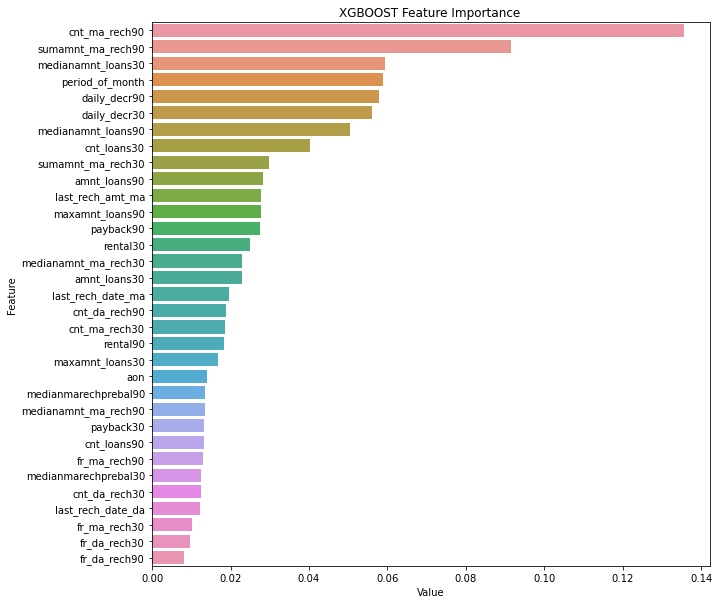

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(feat_imp_xgb["Value"],feat_imp_xgb["Feature"])
plt.title("XGBOOST Feature Importance ")
plt.show()

#### All models Comparison

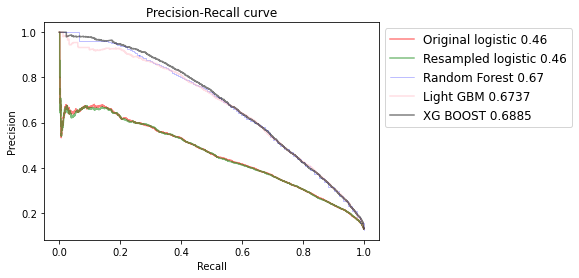

In [89]:
pred_prob = xgb1.predict_proba(X_validate)
xgb1_score = pred_prob[:,1]
average_precision_xgb1 = round(average_precision_score(y_validate, xgb1_score),4)
xgb1_precision, xgb1_recall, xgb1_thresholds = precision_recall_curve(y_validate, xgb1_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label=f'Original logistic {average_precision_lr}')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label=f'Resampled logistic {average_precision_lr_smote}')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=0.5,label=f'Random Forest {average_precision_rf}')
plt.step(lgb_recall, lgb_precision, color='pink', alpha=0.5,linewidth=1.5,label=f'Light GBM {average_precision_lgb1}')
plt.step(xgb1_recall, xgb1_precision, color='black', alpha=0.5,linewidth=1.5,label=f'XG BOOST {average_precision_xgb1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

In [91]:
average_precision["XG-BOOST"]=average_precision_xgb1

In [129]:
model=[]
pr_score=[]
for key,values in average_precision.items():
    model.append(key)
    pr_score.append(values)

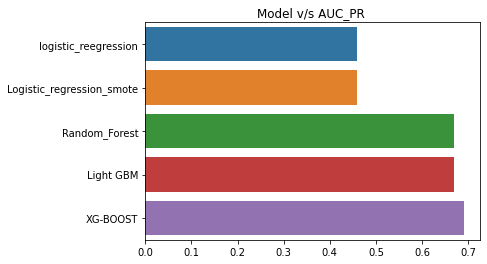

In [136]:
sns.barplot(pr_score,model)
plt.title("Model v/s AUC_PR ")
plt.show()

#### From above chart and precision recall curves we can see that XGBOOST performance is best among all the models

####  Precision Recall v/s Threshold 

(0.0, 1.0)

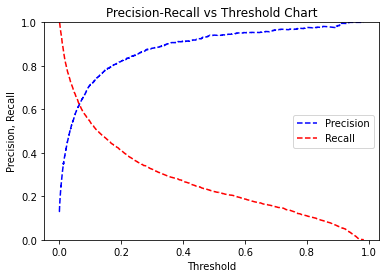

In [80]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(xgb1_thresholds, xgb1_precision[: -1], "b--", label="Precision")
plt.plot(xgb1_thresholds, xgb1_recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

#### Best threshold for maximum f1 score 

In [99]:
f1_score=[]
for prec,rec in zip(xgb1_precision,xgb1_recall):
    f1=((2*prec*rec)/(prec+rec))
    f1_score.append(f1)
max_f1=max(f1_score)
for thresh,f1 in zip(xgb1_thresholds,f1_score):
    if f1==max_f1:
        print(f'best threshold :{thresh} and best f1 =  {f1}')

best threshold :0.06002296507358551 and best f1 =  0.6241250583294446


#### making prediction on test dataset using these threshold

In [116]:
y_pred=[]
y_pred_xgb = xgb1.predict_proba(X_test.values)[:,1]
for value in y_pred_xgb:
    if value>=0.06002296507358551:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred_xgb=np.array(y_pred)

#### Classification Report on Test Dataset

In [ ]:
from sklearn.metrics import  roc_curve,roc_auc_score, auc, classification_report

In [118]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     36687
           1       0.62      0.66      0.64      5232

    accuracy                           0.91     41919
   macro avg       0.78      0.80      0.79     41919
weighted avg       0.91      0.91      0.91     41919



In [137]:
import scikitplot as skplt

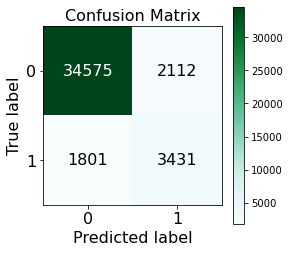

In [139]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_xgb,
    figsize=(4,4),
    title_fontsize='16',
    text_fontsize='16',
    title ='Confusion Matrix',
    cmap='BuGn'
    )
plt.show()

- here, my model is ready. but, this may not be the ultimate solution as strictly labelling customers will be delinquent or not is leading to loss of some information , for example person having probablity of being delinquent as 0.95 is given same importance as customer being delinquent  who has got probablity of say 0.4 , but if we have limited resources then we should first target the customer having maxmum probablity , so we should take their probablity into account instead of strict labels.

##  USE CASES

- Now the company may decide to send a reminder sms or calls to everyone who takes the loan as a solution
- These reminders are mainly intended for those customers who dont return the loan within 5 days
- Since percentage of such customers are only around 12.5%, hence reminders for every customer is very inefficient and costly affair
- So, with the help of our models , we will try to make this solution efficient and decrease its overall cost

## Lift Analysis 

#### lift chart and Analysis will help us in understanding performance of our model in different probablity range.

In [154]:
y_pred_prob_rf = rf1.predict_proba(X_test_rf.values)[:,1]
pred_bins=pd.DataFrame(index=X_test_rf.index,data={'Actual':y_test_rf,'PredProb':y_pred_prob_rf})
pred_bins.head()

,Actual,PredProb
57544,0,0.009427
95765,0,0.063786
118657,0,0.227343
35498,0,0.345745
171728,0,0.035896


In [218]:
pred_bins['Probabilty Bins']=pd.cut(x=pred_bins['PredProb'],bins=[i/10 for i in range(11)])
lift=pred_bins.groupby('Probabilty Bins')[['Actual']].mean()
lift['EF']=lift['Actual']/0.125 #since 12.5% actually dont return 
lift = np.round(lift,2)
lift.columns = ['Target_perc', 'Effeciency']
lift = lift.reset_index()
lift['Probabilty Bins'] = lift['Probabilty Bins'].astype(str)

In [219]:
lift

,Probabilty Bins,Target_perc,Effeciency
0,"(0.0, 0.1]",0.02,0.13
1,"(0.1, 0.2]",0.08,0.67
2,"(0.2, 0.3]",0.16,1.25
3,"(0.3, 0.4]",0.20,1.64
4,"(0.4, 0.5]",0.28,2.25
5,"(0.5, 0.6]",0.33,2.63
6,"(0.6, 0.7]",0.41,3.31
7,"(0.7, 0.8]",0.53,4.20
8,"(0.8, 0.9]",0.67,5.34
9,"(0.9, 1.0]",0.86,6.87


In [220]:
import matplotlib

In [221]:
def create_proxy(label):
    line = matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='black',
                mec='none', marker=r'$\mathregular{{{}}}$'.format(label))
    return line

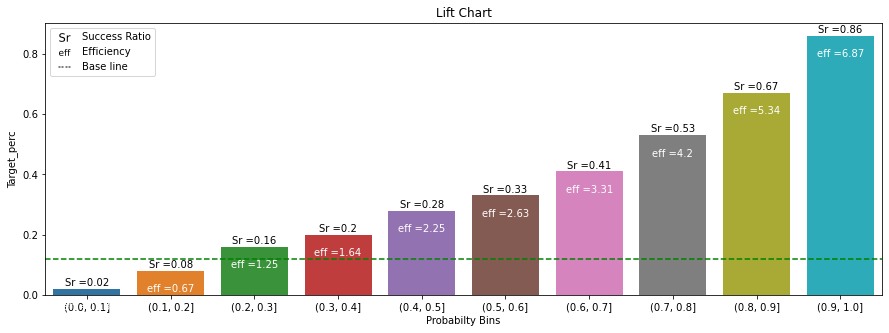

In [225]:
plt.figure(figsize=(15,5))
plt.title('Lift Chart')
labels = ['Sr', 'eff', '----']
proxies = [create_proxy(item) for item in labels]
descriptions = ['Success Ratio', 'Efficiency', 'Base line']
g =sns.barplot(x='Probabilty Bins',y='Target_perc',data=lift)
g.axhline(0.12,color="green",linestyle ="--",label ='base line')
for index, row in lift.iterrows():
    g.text(row.name,row.Target_perc+0.01,"Sr ="+ str(round(row.Target_perc,2)), color='black', ha="center",label="er")
    g.text(row.name,row.Target_perc-0.07,"eff ="+ str(round(row.Effeciency,2)), color='white', ha="center")
plt.legend(proxies, descriptions,numpoints=1, markerscale=2)
plt.show()

#### Proposed Solution

- With the help of this chart we can implement different policy for different groups 
- for all the bars having efficiency factor greater than 1 we can use Machine learning models
- we may decide to go for setting caller tune reminders for people falling in bins with higher efficiency and set SMS reminders for remaining customers , as per the need and budget. 

### Trying Recursive Feature Elimination to see if model performance improves 

In [92]:
from sklearn.feature_selection import RFE
from sklearn import metrics


In [125]:
number_of_features=[]
average_precision_score_list=[]
def run_xgBoost(X_train_e, X_test, y_train_e, y_test,index):
    clf=XGBClassifier(verbosity=0,
#                      **studylgb1.best_params
                     random_state=3,
                    **xgb_best_params
                     )
    clf.fit(X_train_e, y_train_e)
    pred_prob = clf.predict_proba(X_test)
    xgb1_score = pred_prob[:,1]
    average_precision_xgb1 = round(metrics.average_precision_score(y_test, xgb1_score),4)
    number_of_features.append(index)
    average_precision_score_list.append(average_precision_xgb1)
    
    print("Average_precision :", average_precision_xgb1)

In [142]:
for index in range(20,35):    
    sel =  RFE(XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print('Selected Feature: ', index)
    run_xgBoost(X_train_rfe, X_test_rfe, y_train, y_test,index)
    print()###

In [119]:
df_ap_score=pd.DataFrame({
     "number_of_features":number_of_features,
    "PR_AUC":average_precision_score_list
})

In [124]:
df_ap_score.to_csv("df_ap_score.csv",index=False)

#### Recursive Feature elimination

In [147]:
df_ap_score=pd.read_csv("df_ap_score.csv")
# df_ap_score

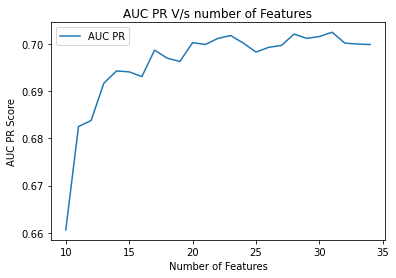

In [139]:
plt.plot(df_ap_score["number_of_features"],df_ap_score["PR_AUC"],label="AUC PR")
plt.title("AUC PR V/s number of Features")
plt.xlabel("Number of Features")
plt.ylabel("AUC PR Score")
plt.legend()
plt.show()

#### We get best model when number of Features = 31 and score 0.7025 , using recursicve feature elimination . which is significantly higher than 0.6885 with all the features. 

In [148]:
sel =  RFE(XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 31)
sel.fit(X_train, y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print('Selected Feature: ', 31)
run_xgBoost(X_train_rfe, X_test_rfe, y_train, y_test,index)


clf=XGBClassifier(verbosity=0,
#                      **studylgb1.best_params
                     random_state=3,
                    **xgb_best_params
                     )
clf.fit(X_train_rfe, y_train)
pred_prob = clf.predict_proba(X_test_rfe)
xgb1_score = pred_prob[:,1]
average_precision_xgb1 = round(metrics.average_precision_score(y_test, xgb1_score),4)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Selected Feature:  31
Average_precision : 0.7025


- we got a 2% increase in AUC PR Score using Feature elimination. so , we can increase the performance of original XGBoost model by elimination 3 most unimportant features.

####  -------------------------------------------------------------------   Thank You   ------------------------------------------------------------------------